In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [104]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

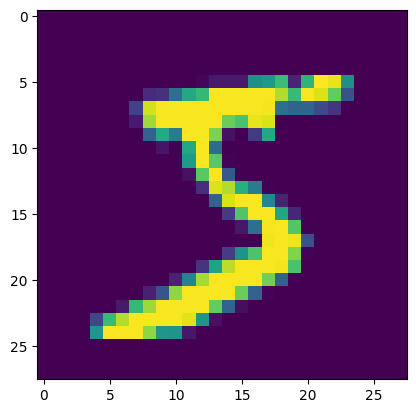

In [105]:
plt.imshow(X_train[0])

In [106]:
y_train==0

array([False,  True, False, ..., False, False, False])

In [107]:
only_zeros = X_train[y_train==0]

In [108]:
only_zeros.shape

(5923, 28, 28)

In [109]:
X_train.shape

(60000, 28, 28)

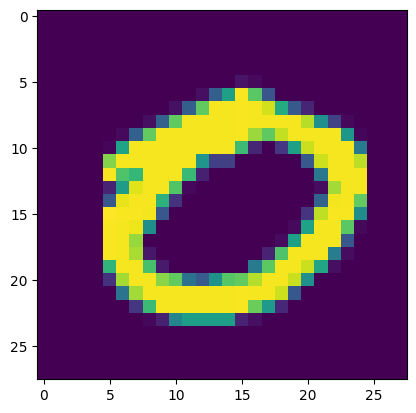

In [110]:
plt.imshow(only_zeros[14])

In [111]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [112]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100,activation = 'relu'))
discriminator.add(Dense(1, activation = 'sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [113]:
coding_size = 200
generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape = [coding_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

In [114]:
GAN = Sequential([generator, discriminator])
discriminator.trainable = False

In [115]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [116]:
batch_size = 32

In [117]:
my_data = only_zeros #my_data = X_train

In [118]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [119]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [120]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [121]:
epochs = 1

In [122]:
GAN.layers[0].layers

In [123]:
GAN.layers[1].layers

In [124]:
GAN.layers[0].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               20100     
                                                                 
 dense_22 (Dense)            (None, 150)               15150     
                                                                 
 dense_23 (Dense)            (None, 784)               118384    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 153634 (600.13 KB)
Trainable params: 153634 (600.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
GAN.layers[1].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 150)               117750    
                                                                 
 dense_19 (Dense)            (None, 100)               15100     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [126]:
generator, discriminator = GAN.layers
for epoch in range(epochs):
  print(f"Currently on Epoch{epoch+1}")
  i = 0;
  for X_batch in dataset:
    i = i+1
    if i%100 == 0:
      print(f"\t Currently on batch number {i} of {(len(my_data)//batch_size)}")

      #Discriminator
      noise = tf.random.normal(shape = [batch_size, coding_size])
      gen_images = generator(noise)
      X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0)
      y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_vs_real,y1)

      #train generator
      noise = tf.random.normal(shape = [batch_size, coding_size])
      y2 = tf.constant([[1.0]]*batch_size)
      discriminator.trainable = False
      GAN.train_on_batch(noise, y2)

Currently on Epoch1
	 Currently on batch number 100 of 185


In [127]:
noise = tf.random.normal(shape = [10, coding_size])

In [128]:
noise.shape

TensorShape([10, 200])

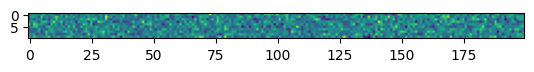

In [129]:
plt.imshow(noise)

In [130]:
images = generator(noise)

In [131]:
images.shape

TensorShape([10, 28, 28])

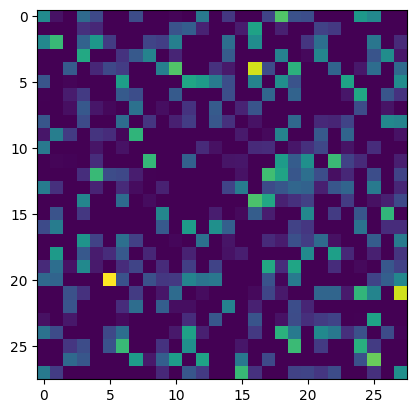

In [132]:
plt.imshow(images[0])

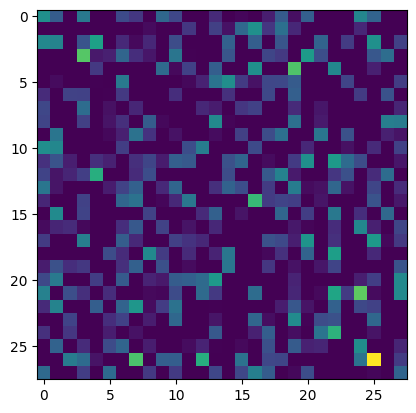

In [133]:
plt.imshow(images[1])

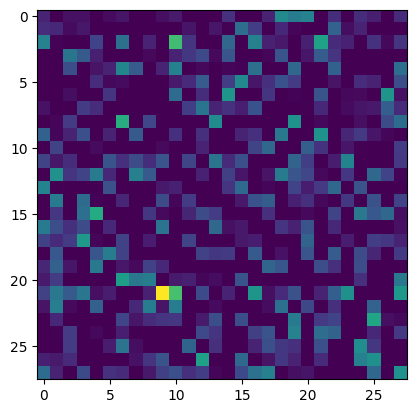

In [134]:
plt.imshow(images[2])

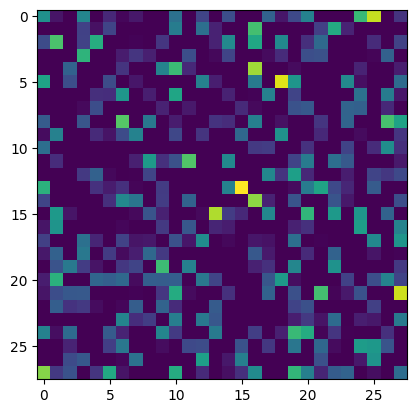

In [135]:
plt.imshow(images[4])

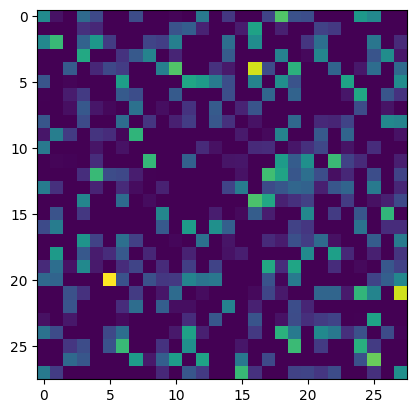

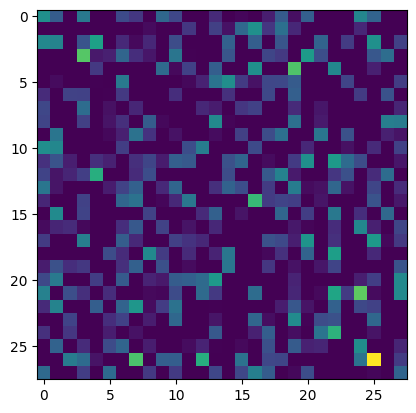

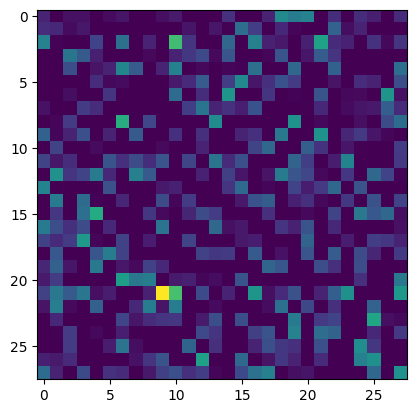

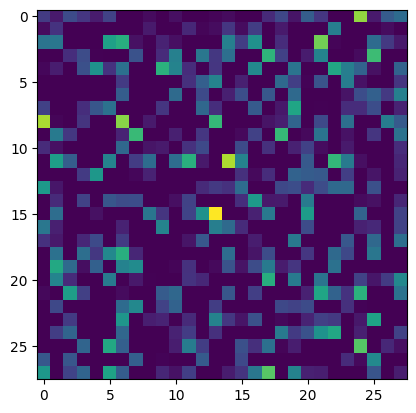

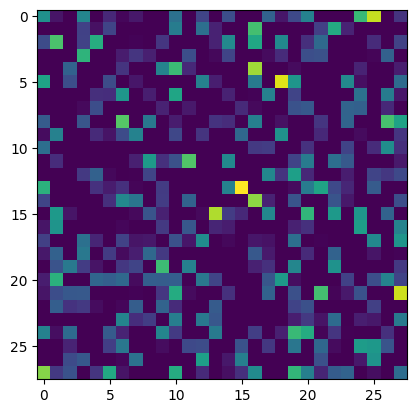

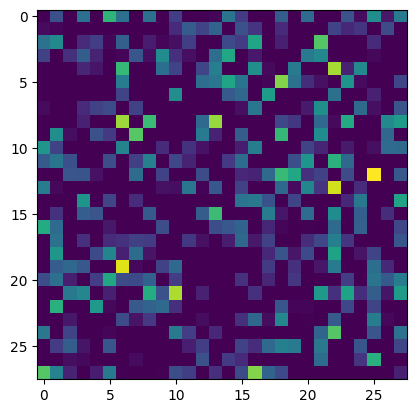

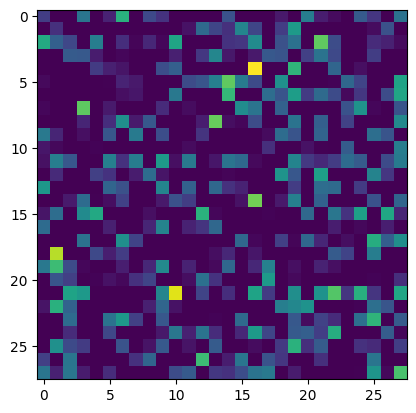

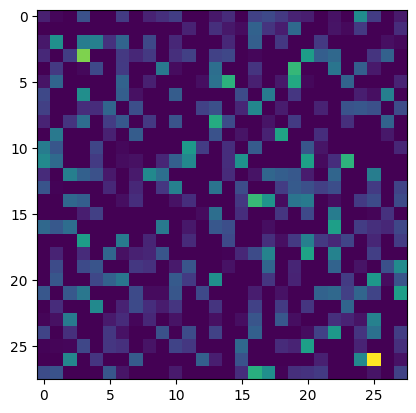

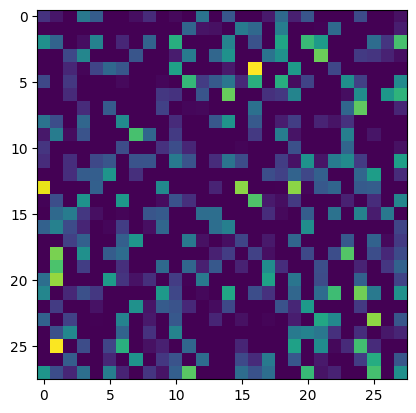

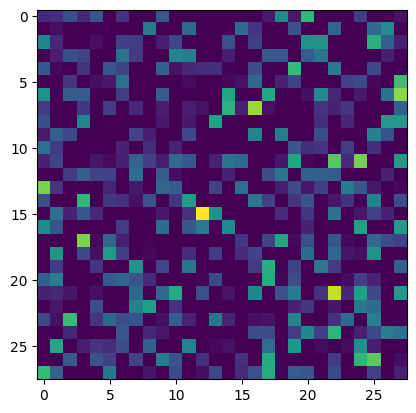

In [136]:
for image in images:
    plt.imshow(image.numpy().reshape(28,28))
    plt.show()